In [134]:
using Gillespie
using Gadfly
using KernelDensity

In [2]:
function tumorgrowth2(x,p)
    (c1,c2) = x
    (b1,d1,b2,d2) = p
    a1 = b1*c1 #clone1 birth
    a2 = d1*c1 #clone1 death
    a3 = b2*c2
    a4 = d2*c2
    [a1,a2,a3,a4]
end
S = [[1 0];[-1 0];[0 1];[0 -1]]

4×2 Array{Int64,2}:
  1   0
 -1   0
  0   1
  0  -1

In [82]:
x0 = [3, 1]
p = [1, 0.5, 1, 0.5]
tfinal = 1000.0

result = ssaN(x0, tumorgrowth2, S, p, tfinal)
data = ssa_data(result);
plot(data,
    layer(x=:time,y=:x1,Geom.step,Theme(default_color=colorant"orange")),
    layer(x=:time,y=:x2,Geom.step,Theme(default_color=colorant"blue")),
    Guide.xlabel("Time"),
    Guide.ylabel("Number"),
    Guide.title("SSA simulation"),
)
print(data[:x1][end])

162

In [301]:
#p = [1.3, 0.5, 1, 0.5]
#p = [1, 0.5, 1, 0.71]
p = [1, 0.5, 1, 0.5]
#p = [2.5, 0, 2.5, 0]
Nfinal = 1000.0

C1 = []
C2 = []

j=9
#for j = 9:2:23
for i = 1:10000
    x0 = [j, 1]
    result = ssaN(x0, tumorgrowth2, S, p, Nfinal)
    data = ssa_data(result)
    push!(C1, data[:x1][end])
    push!(C2, data[:x2][end])
end
#    C1_noext = C1[(C1.!=1001) .* (C1.!=0)]/1001
#append!(mp.layers, layer(x=(1-C1_noext)/2, Geom.density))
#end

In [302]:
C2_noext_neut = C2[(C2.!=1001) .* (C2.!=0)]/2002

4961-element Array{Float64,1}:
 0.115884  
 0.228771  
 0.27972   
 0.045954  
 0.021978  
 0.00899101
 0.111389  
 0.0244755 
 0.0769231 
 0.0404595 
 0.0909091 
 0.118382  
 0.132867  
 ⋮         
 0.389111  
 0.0204795 
 0.041958  
 0.133367  
 0.164835  
 0.198801  
 0.0959041 
 0.0984016 
 0.033966  
 0.001998  
 0.0504496 
 0.136364  

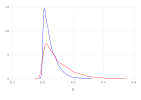

In [303]:
plot(layer(x=C2_noext_neut,Geom.density,Theme(default_color=colorant"red")),
    layer(x=C2_noext_neut2,Geom.density,Theme(default_color=colorant"blue")))

In [259]:
writedlm("tmp_neg.txt", C2_noext_neg)

In [216]:
draw(SVG("Neutral_clone.svg", 6inch, 5inch), mp)

false

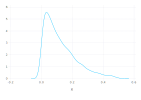

In [210]:
C1_noext = C1[(C1.!=1001) .* (C1.!=0)]/1001
mp = plot(x=(1-C1_noext)/2, Geom.density)

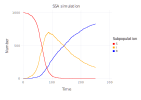

In [17]:
function F(x,parms)
  (S,I,R) = x
  (beta,gamma) = parms
  infection = beta*S*I
  recovery = gamma*I
  [infection,recovery]
end

x0 = [999,1,0]
nu = [[-1 1 0];[0 -1 1]]
parms = [0.1/1000.0,0.01]
tf = 250.0
#srand(1234)

result = ssa(x0,F,nu,parms,tf)

data = ssa_data(result)

plot_theme = Theme(
    panel_fill=colorant"white",
    default_color=colorant"black"
)
p=plot(data,
    layer(x=:time,y=:x1,Geom.step,Theme(default_color=colorant"red")),
    layer(x=:time,y=:x2,Geom.step,Theme(default_color=colorant"orange")),
    layer(x=:time,y=:x3,Geom.step,Theme(default_color=colorant"blue")),
    Guide.xlabel("Time"),
    Guide.ylabel("Number"),
    Guide.title("SSA simulation"),
    Guide.manual_color_key("Subpopulation",["S","I","R"],["red","orange","blue"]),
    plot_theme
)

In [213]:
collect(8:2:26)

10-element Array{Int64,1}:
  8
 10
 12
 14
 16
 18
 20
 22
 24
 26